In [1]:
import numpy as np
import pandas as pd
import Thermobar as pt
import matplotlib.pyplot as plt

## Example monte Carlo simulation for amphibole
- Loading in experimental imprecision from Kraw et al. 2012

In [2]:
KrawErr=pd.read_excel(r'G:\My Drive\Postdoc\PyMME\MyBarometers\LEPR_Tests\Tidy_Tukey_Exp_Av\Clinopyroxene_Assesment\paper1_NoisePropagation\Submit_July18th_2022\Supporting_Info\Supporting_Data_3.xlsx',
                   sheet_name='Kraw13_042907_Analyses')
KrawAmp_in=pt.import_excel(r'G:\My Drive\Postdoc\PyMME\MyBarometers\LEPR_Tests\Tidy_Tukey_Exp_Av\Clinopyroxene_Assesment\paper1_NoisePropagation\Submit_July18th_2022\Supporting_Info\Supporting_Data_2.xlsx',
                   sheet_name='41c_103a', suffix='_Amp')
KrawAmp=KrawAmp_in['Amps']



In [3]:
KrawErr_Amp=KrawErr.loc[KrawErr['Name']=="41c-103a amph3"]
Kraw_06_41c_amp=KrawAmp
Kraw_Amp_Av=Kraw_06_41c_amp.mean(axis=0).to_frame().T
Kraw_Amp_Av

,SiO2_Amp,TiO2_Amp,Al2O3_Amp,FeOt_Amp,MnO_Amp,MgO_Amp,CaO_Amp,Na2O_Amp,K2O_Amp,Cr2O3_Amp,F_Amp,Cl_Amp,Sample_ID_Amp
0,47.885556,0.973144,10.148889,7.548889,0.118822,17.766667,11.15,2.152678,0.217578,0.207622,0.0,0.0,4.0


In [4]:


B1038_Amp_Err1=pd.DataFrame(data={'SiO2_Amp_Err': KrawErr_Amp.loc[KrawErr_Amp['Element']=="SiO2", 'Error_Per'].values,
                            'TiO2_Amp_Err':KrawErr_Amp.loc[KrawErr_Amp['Element']=="TiO2", 'Error_Per'].values,
                             'Al2O3_Amp_Err':KrawErr_Amp.loc[KrawErr_Amp['Element']=="Al2O3", 'Error_Per'].values,
                             'FeOt_Amp_Err':KrawErr_Amp.loc[KrawErr_Amp['Element']=="FeO", 'Error_Per'].values,
                            'MnO_Amp_Err':KrawErr_Amp.loc[KrawErr_Amp['Element']=="MnO", 'Error_Per'].values,
                            'MgO_Amp_Err':KrawErr_Amp.loc[KrawErr_Amp['Element']=="MgO", 'Error_Per'].values,
                            'CaO_Amp_Err':KrawErr_Amp.loc[KrawErr_Amp['Element']=="CaO", 'Error_Per'].values,
                            'Na2O_Amp_Err':KrawErr_Amp.loc[KrawErr_Amp['Element']=="Na2O", 'Error_Per'].values,
                            'Cr2O3_Amp_Err':KrawErr_Amp.loc[KrawErr_Amp['Element']=="Cr2O3", 'Error_Per'].values,
                               'K2O_Amp_Err': 0}, index=[0])
B1038_AmpAv_noise1=pt.add_noise_sample_1phase(phase_comp=Kraw_Amp_Av, phase_err=B1038_Amp_Err1,
                                             phase_err_type="Perc", duplicates=500, err_dist="normal",
                                            positive=False)
B1038_AmpAv_noise1['Sample_ID_Amp']="MC"

Amp_B1038_Medard=pt.calculate_amp_only_press(amp_comps=B1038_AmpAv_noise1, 
                                               equationP='P_Medard2022_MutchSites')

Amp_Ridolfi=pt.calculate_amp_only_press_temp(amp_comps=B1038_AmpAv_noise1, 
                                               equationP='P_Ridolfi2021',
                                            equationT='T_Ridolfi2012')


In [5]:
np.std(Amp_B1038_Medard)

0.14726296293218596

In [6]:
np.std(Amp_Ridolfi['P_kbar_calc'])

0.06289441675435664

(array([ 3.,  6., 20., 31., 37., 36., 33., 33., 13.,  3.]),
 array([2.47707903, 2.50987414, 2.54266924, 2.57546435, 2.60825945,
        2.64105456, 2.67384966, 2.70664477, 2.73943987, 2.77223498,
        2.80503008]),
 <BarContainer object of 10 artists>)

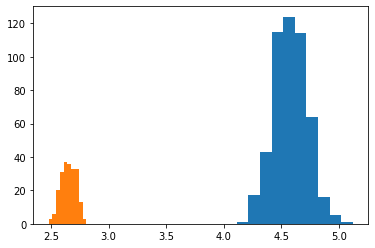

In [7]:
plt.hist(Amp_B1038_Medard, label='Medard')
plt.hist(Amp_Ridolfi['P_kbar_calc'], label='Ridolfi')

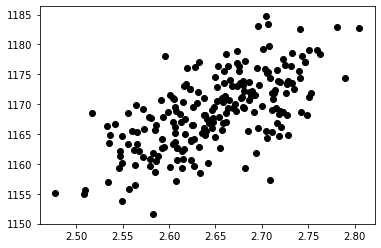

In [8]:
plt.plot(Amp_Ridolfi['P_kbar_calc'], Amp_Ridolfi['T_K_calc'], 'ok')

## Cpx only

In [9]:
KrawErr_Cpx=KrawErr.loc[KrawErr['Name']=="B1038 cpx14"]

In [10]:
KrawCpx_in=pt.import_excel(r'G:\My Drive\Postdoc\PyMME\MyBarometers\LEPR_Tests\Tidy_Tukey_Exp_Av\Clinopyroxene_Assesment\paper1_NoisePropagation\Submit_July18th_2022\Supporting_Info\Supporting_Data_2.xlsx',
                   sheet_name='B1038', suffix='_Cpx')
KrawCpx=KrawCpx_in['Cpxs']

In [11]:
Kraw_Cpx=KrawCpx.loc[KrawCpx['Sample_ID_Cpx']=="B1038cpx3"]
Kraw_06_41c_Cpx=Kraw_Cpx
Kraw_Cpx_Av=Kraw_06_41c_Cpx.mean(axis=0).to_frame().T
Kraw_Cpx_Av

C:\Users\penny\AppData\Local\Temp\ipykernel_39396\1619967589.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Kraw_Cpx_Av=Kraw_06_41c_Cpx.mean(axis=0).to_frame().T


,SiO2_Cpx,TiO2_Cpx,Al2O3_Cpx,FeOt_Cpx,MnO_Cpx,MgO_Cpx,CaO_Cpx,Na2O_Cpx,K2O_Cpx,Cr2O3_Cpx
0,52.96,0.2378,1.916,4.83,0.1458,18.37,19.87,0.322,0.0,0.5386


In [12]:


B1038_Cpx_Err1=pd.DataFrame(data={'SiO2_Cpx_Err': KrawErr_Cpx.loc[KrawErr_Cpx['Element']=="SiO2", 'Error_Per'].values,
                            'TiO2_Cpx_Err':KrawErr_Cpx.loc[KrawErr_Cpx['Element']=="TiO2", 'Error_Per'].values,
                             'Al2O3_Cpx_Err':KrawErr_Cpx.loc[KrawErr_Cpx['Element']=="Al2O3", 'Error_Per'].values,
                             'FeOt_Cpx_Err':KrawErr_Cpx.loc[KrawErr_Cpx['Element']=="FeO", 'Error_Per'].values,
                            'MnO_Cpx_Err':KrawErr_Cpx.loc[KrawErr_Cpx['Element']=="MnO", 'Error_Per'].values,
                            'MgO_Cpx_Err':KrawErr_Cpx.loc[KrawErr_Cpx['Element']=="MgO", 'Error_Per'].values,
                            'CaO_Cpx_Err':KrawErr_Cpx.loc[KrawErr_Cpx['Element']=="CaO", 'Error_Per'].values,
                            'Na2O_Cpx_Err':KrawErr_Cpx.loc[KrawErr_Cpx['Element']=="Na2O", 'Error_Per'].values,
                            'Cr2O3_Cpx_Err':KrawErr_Cpx.loc[KrawErr_Cpx['Element']=="Cr2O3", 'Error_Per'].values,
                               'K2O_Cpx_Err': 0}, index=[0])
B1038_CpxAv_noise1=pt.add_noise_sample_1phase(phase_comp=Kraw_Cpx_Av, phase_err=B1038_Cpx_Err1,
                                             phase_err_type="Perc", duplicates=500, err_dist="normal",
                                            positive=False)
B1038_CpxAv_noise1['Sample_ID_Cpx']="MC"

Cpx_B1038_Putirka=pt.calculate_cpx_only_press_temp(cpx_comps=B1038_CpxAv_noise1, 
                                               equationP='P_Put2008_eq32b',
                                             equationT='T_Put2008_eq32d')

Cpx_B1038_Wang=pt.calculate_cpx_only_press_temp(cpx_comps=B1038_CpxAv_noise1, 
                                               equationP='P_Wang2021_eq1',
                                            equationT='T_Wang2021_eq2')


C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2115: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)
C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2115: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)
g:\my drive\postdoc\pymme\mybarometers\thermobar_outer\src\Thermobar\clinopyroxene_thermobarometry.py:2979: UserWarning: This Cpx-only barometer is sensitive to H2O content of the liquid.  By default, this function uses H2O=0 wt%, else you can enter a value of H2O_Liq in the function
  w.warn('This Cpx-only barometer is sensitive to H2O content of the liquid. '


Youve selected a P-independent function
Youve selected a T-independent function


C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2115: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)
g:\my drive\postdoc\pymme\mybarometers\thermobar_outer\src\Thermobar\clinopyroxene_thermobarometry.py:3197: UserWarning: This Cpx-only thermometer is sensitive to H2O content of the liquid.  By default, this function uses H2O=0 wt%, else you can enter a value of H2O_Liq in the function
  w.warn('This Cpx-only thermometer is sensitive to H2O content of the liquid. '
C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2115: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)


(array([  8.,  12.,  45.,  71., 106., 107.,  96.,  35.,  14.,   6.]),
 array([1.29554901, 1.69961768, 2.10368635, 2.50775501, 2.91182368,
        3.31589234, 3.71996101, 4.12402968, 4.52809834, 4.93216701,
        5.33623568]),
 <BarContainer object of 10 artists>)

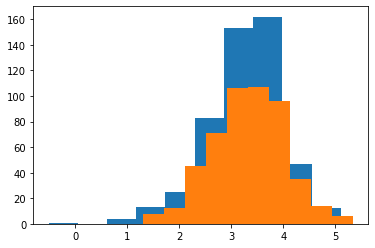

In [13]:
plt.hist(Cpx_B1038_Putirka['P_kbar_calc'], label='Medard')
plt.hist(Cpx_B1038_Wang['P_kbar_calc'], label='Ridolfi')

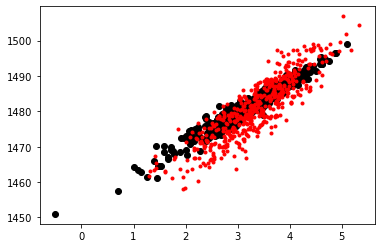

In [14]:
plt.plot(Cpx_B1038_Putirka['P_kbar_calc'], Cpx_B1038_Putirka['T_K_calc'], 'ok')
plt.plot(Cpx_B1038_Wang['P_kbar_calc'], Cpx_B1038_Wang['T_K_calc'], '.r')

## Making noise for Opx

In [15]:
KrawErr2=pd.read_excel(r'G:\My Drive\Postdoc\PyMME\MyBarometers\LEPR_Tests\Tidy_Tukey_Exp_Av\Clinopyroxene_Assesment\paper1_NoisePropagation\Submit_July18th_2022\Supporting_Info\Supporting_Data_3.xlsx',
                   sheet_name='Kraw13_083006_Analyses')

KrawErr_Opx=KrawErr2.loc[KrawErr2['Name']=="B1038-opx2"]


In [16]:
KrawOpx_in=pt.import_excel(r'G:\My Drive\Postdoc\PyMME\MyBarometers\LEPR_Tests\Tidy_Tukey_Exp_Av\Clinopyroxene_Assesment\paper1_NoisePropagation\Submit_July18th_2022\Supporting_Info\Supporting_Data_2.xlsx',
                   sheet_name='B1038', suffix='_Opx')
KrawOpx=KrawOpx_in['Opxs']

In [17]:
Kraw_Opx=KrawOpx.loc[KrawOpx['Sample_ID_Opx']=="B1038-opx1"]
Kraw_06_41c_Opx=Kraw_Opx
Kraw_Opx_Av=Kraw_06_41c_Opx.mean(axis=0).to_frame().T
Kraw_Opx_Av

C:\Users\penny\AppData\Local\Temp\ipykernel_39396\2369468557.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Kraw_Opx_Av=Kraw_06_41c_Opx.mean(axis=0).to_frame().T


,SiO2_Opx,TiO2_Opx,Al2O3_Opx,FeOt_Opx,MnO_Opx,MgO_Opx,CaO_Opx,Na2O_Opx,K2O_Opx,Cr2O3_Opx
0,55.92,0.1547,1.2912,10.73,0.2063,28.9,1.9042,0.0,0.0,0.2224


In [18]:
opx_c=pt.calculate_orthopyroxene_components(opx_comps=Kraw_Opx_Av)

opx_c['FmAl2SiO6']

0    0.034428
Name: FmAl2SiO6, dtype: float64

In [19]:
B1038_Opx_Err1=pd.DataFrame(data={'SiO2_Opx_Err': KrawErr_Opx.loc[KrawErr_Opx['Element']=="SiO2", 'Error_Per'].values,
                            'TiO2_Opx_Err':KrawErr_Opx.loc[KrawErr_Opx['Element']=="TiO2", 'Error_Per'].values,
                             'Al2O3_Opx_Err':KrawErr_Opx.loc[KrawErr_Opx['Element']=="Al2O3", 'Error_Per'].values,
                             'FeOt_Opx_Err':KrawErr_Opx.loc[KrawErr_Opx['Element']=="FeO", 'Error_Per'].values,
                            'MnO_Opx_Err':KrawErr_Opx.loc[KrawErr_Opx['Element']=="MnO", 'Error_Per'].values,
                            'MgO_Opx_Err':KrawErr_Opx.loc[KrawErr_Opx['Element']=="MgO", 'Error_Per'].values,
                            'CaO_Opx_Err':KrawErr_Opx.loc[KrawErr_Opx['Element']=="CaO", 'Error_Per'].values,
                            'Na2O_Opx_Err':KrawErr_Opx.loc[KrawErr_Opx['Element']=="Na2O", 'Error_Per'].values,
                            'Cr2O3_Opx_Err':KrawErr_Opx.loc[KrawErr_Opx['Element']=="Cr2O3", 'Error_Per'].values,
                               'K2O_Opx_Err': 0}, index=[0])
B1038_OpxAv_noise1=pt.add_noise_sample_1phase(phase_comp=Kraw_Opx_Av, phase_err=B1038_Opx_Err1,
                                             phase_err_type="Perc", duplicates=500, err_dist="normal",
                                            positive=False)
B1038_OpxAv_noise1['Sample_ID_Opx']="MC"

## Opx-Cpx pressures

In [21]:
CalcP_3639_all=pt.calculate_cpx_opx_press_temp_matching(opx_comps=B1038_OpxAv_noise1, cpx_comps=B1038_CpxAv_noise1,
                                           equationT='T_Put2008_eq36',
                                           equationP='P_Put2008_eq39',
                                            return_all_pairs=True)
CalcP_3639=CalcP_3639_all['All_PTs']

C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2115: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)


Considering 250000 Opx-Cpx pairs, be patient if this is >>1 million!
No Kd selected, all matches are shown
Done!


In [22]:
CalcP_3639_all=pt.calculate_cpx_opx_press_temp_matching(opx_comps=B1038_OpxAv_noise1, cpx_comps=B1038_CpxAv_noise1,
                                           equationT='T_Put2008_eq36',
                                           equationP='P_Put2008_eq39', return_all_pairs=True)
CalcP_3639=CalcP_3639_all['All_PTs']

CalcP_3638_all=pt.calculate_cpx_opx_press_temp_matching(opx_comps=B1038_OpxAv_noise1, cpx_comps=B1038_CpxAv_noise1,
                                           equationT='T_Put2008_eq36',
                                           equationP='P_Put2008_eq38',
                                                         return_all_pairs=True)

CalcP_3638=CalcP_3638_all['All_PTs']

CalcP_3739_all=pt.calculate_cpx_opx_press_temp_matching(opx_comps=B1038_OpxAv_noise1, cpx_comps=B1038_CpxAv_noise1,
                                           equationT='T_Put2008_eq37',
                                           equationP='P_Put2008_eq39'
                                                        , return_all_pairs=True)
CalcP_3739=CalcP_3739_all['All_PTs']

CalcP_3738_all=pt.calculate_cpx_opx_press_temp_matching(opx_comps=B1038_OpxAv_noise1, cpx_comps=B1038_CpxAv_noise1,
                                           equationT='T_Put2008_eq37',
                                           equationP='P_Put2008_eq38'
                                                        , return_all_pairs=True)
CalcP_3738=CalcP_3738_all['All_PTs']


C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2115: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)


Considering 250000 Opx-Cpx pairs, be patient if this is >>1 million!
No Kd selected, all matches are shown
Done!


C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2115: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)


Considering 250000 Opx-Cpx pairs, be patient if this is >>1 million!
No Kd selected, all matches are shown
Youve selected a T-independent function
Done!


C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2115: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)


Considering 250000 Opx-Cpx pairs, be patient if this is >>1 million!
No Kd selected, all matches are shown
Done!


C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2115: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)


Considering 250000 Opx-Cpx pairs, be patient if this is >>1 million!
No Kd selected, all matches are shown
Youve selected a T-independent function
Done!


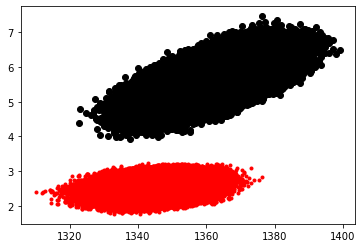

In [23]:
plt.plot(CalcP_3639['T_K_calc'], CalcP_3639['P_kbar_calc'], 'ok')
plt.plot(CalcP_3638['T_K_calc'], CalcP_3638['P_kbar_calc'], '.r')

## Glass compositions

In [24]:
KrawErr_Liq=KrawErr.loc[KrawErr['Name']=="B1038 Glass"]

In [25]:
KrawLiq_in=pt.import_excel(r'G:\My Drive\Postdoc\PyMME\MyBarometers\LEPR_Tests\Tidy_Tukey_Exp_Av\Clinopyroxene_Assesment\paper1_NoisePropagation\Submit_July18th_2022\Supporting_Info\Supporting_Data_2.xlsx',
                   sheet_name='B1038_Glass', suffix='_Liq')
KrawLiq=KrawLiq_in['Liqs']

In [26]:
Kraw_Liq=KrawLiq
Kraw_Liq_Av=Kraw_Liq.mean(axis=0).to_frame().T
Kraw_Liq_Av['H2O_Liq']=12.9

In [27]:
B1038_Liq_Err1=pd.DataFrame(data={'SiO2_Liq_Err': KrawErr_Liq.loc[KrawErr_Liq['Element']=="SiO2", 'Error_Per'].values,
                            'TiO2_Liq_Err':KrawErr_Liq.loc[KrawErr_Liq['Element']=="TiO2", 'Error_Per'].values,
                             'Al2O3_Liq_Err':KrawErr_Liq.loc[KrawErr_Liq['Element']=="Al2O3", 'Error_Per'].values,
                             'FeOt_Liq_Err':KrawErr_Liq.loc[KrawErr_Liq['Element']=="FeO", 'Error_Per'].values,
                            'MnO_Liq_Err':KrawErr_Liq.loc[KrawErr_Liq['Element']=="MnO", 'Error_Per'].values,
                            'MgO_Liq_Err':KrawErr_Liq.loc[KrawErr_Liq['Element']=="MgO", 'Error_Per'].values,
                            'CaO_Liq_Err':KrawErr_Liq.loc[KrawErr_Liq['Element']=="CaO", 'Error_Per'].values,
                            'Na2O_Liq_Err':KrawErr_Liq.loc[KrawErr_Liq['Element']=="Na2O", 'Error_Per'].values,
                            'Cr2O3_Liq_Err':KrawErr_Liq.loc[KrawErr_Liq['Element']=="Cr2O3", 'Error_Per'].values,
                              'H2O_Liq':5,
                                  'K2O_Liq_Err': 0}, index=[0])
B1038_LiqAv_noise1=pt.add_noise_sample_1phase(phase_comp=Kraw_Liq_Av, phase_err=B1038_Liq_Err1,
                                             phase_err_type="Perc", duplicates=500, err_dist="normal",
                                            positive=False)
B1038_LiqAv_noise1['Sample_ID_Liq']="MC"


## Liq only error

In [28]:
P=5
if P is not None:
    print('made it here2')
    print('Youve selected a P-independent function')
    P=None


made it here2
Youve selected a P-independent function


In [29]:
Liq_Eq14=pt.calculate_liq_only_temp(liq_comps=B1038_LiqAv_noise1, 
                           equationT='T_Put2008_eq14')

Liq_Eq14

0      1231.309525
1      1235.253559
2      1236.574659
3      1229.869029
4      1232.083369
          ...     
495    1240.814325
496    1233.903401
497    1231.238906
498    1243.019617
499    1236.907161
Length: 500, dtype: float64

In [30]:
Liq_Eq22=pt.calculate_liq_only_temp(liq_comps=B1038_LiqAv_noise1, 
                           equationT='T_Put2008_eq22_BeattDMg', P=8)


In [31]:
Liq_Helz=pt.calculate_liq_only_temp(liq_comps=B1038_LiqAv_noise1, 
                           equationT='T_Helz1987_MgO', P=8)


(array([  1.,   8.,  20., 101., 150., 137.,  63.,  13.,   6.,   1.]),
 array([1376.1055116 , 1376.89980629, 1377.69410099, 1378.48839568,
        1379.28269037, 1380.07698507, 1380.87127976, 1381.66557445,
        1382.45986915, 1383.25416384, 1384.04845853]),
 <BarContainer object of 10 artists>)

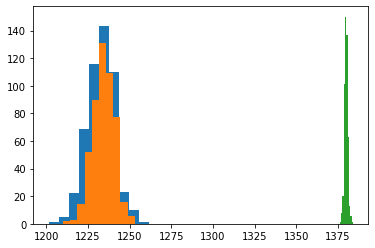

In [32]:
plt.hist(Liq_Eq22)
plt.hist(Liq_Eq14)
plt.hist(Liq_Helz)

## Opx-Liq error

In [33]:
Opx_Liq_28a_29b_all=pt.calculate_opx_liq_press_temp_matching(opx_comps=B1038_OpxAv_noise1,
                                        liq_comps=B1038_LiqAv_noise1,
                                        equationT='T_Put2008_eq28a',
                                        equationP='P_Put2008_eq29b', return_all_pairs=True)

Considering 250000 Liq-Opx pairs, be patient if this is >>1 million!
Finished calculating Ps and Ts, now just averaging the results. Almost there!
Finished!


In [34]:
# B1038_OpxAv_noise2=pt.add_noise_sample_1phase(phase_comp=Kraw_Opx_Av, phase_err=B1038_Opx_Err1,
#                                              phase_err_type="Perc", duplicates=250000, err_dist="normal",
#                                             positive=False)
Opx_Liq_28a_29c=pt.calculate_opx_liq_press_temp(opx_comps=B1038_OpxAv_noise1,
                                        liq_comps=B1038_LiqAv_noise1,
                                        equationT='T_Put2008_eq28a',
                                        equationP='P_Put2008_eq29c')

In [36]:
Opx_Liq_28a_29b_all=pt.calculate_opx_liq_press_temp_matching(opx_comps=B1038_OpxAv_noise1,
                                        
                                        liq_comps=B1038_LiqAv_noise1,
                                        equationT='T_Put2008_eq28a',
                                        equationP='P_Put2008_eq29b', return_all_pairs=True)

Opx_Liq_28b_29b_all=pt.calculate_opx_liq_press_temp_matching(opx_comps=B1038_OpxAv_noise1,
                                        
                                        liq_comps=B1038_LiqAv_noise1,
                                        equationT='T_Put2008_eq28b_opx_sat',
                                        equationP='P_Put2008_eq29b', return_all_pairs=True)


Opx_Liq_28a_29a_all=pt.calculate_opx_liq_press_temp_matching(opx_comps=B1038_OpxAv_noise1,
                                        liq_comps=B1038_LiqAv_noise1,
                                        equationT='T_Put2008_eq28a',
                                        equationP='P_Put2008_eq29a', return_all_pairs=True)


Opx_Liq_28a_Glob_all=pt.calculate_opx_liq_press_temp_matching(opx_comps=B1038_OpxAv_noise1,
                                        liq_comps=B1038_LiqAv_noise1,
                                        equationT='T_Put2008_eq28a',
                                        equationP='P_Put_Global_Opx', return_all_pairs=True)

Considering 250000 Liq-Opx pairs, be patient if this is >>1 million!
Finished calculating Ps and Ts, now just averaging the results. Almost there!
Finished!
Considering 250000 Liq-Opx pairs, be patient if this is >>1 million!
Finished calculating Ps and Ts, now just averaging the results. Almost there!
Finished!
Considering 250000 Liq-Opx pairs, be patient if this is >>1 million!
Finished calculating Ps and Ts, now just averaging the results. Almost there!
Finished!
Considering 250000 Liq-Opx pairs, be patient if this is >>1 million!
Finished calculating Ps and Ts, now just averaging the results. Almost there!
Finished!


In [37]:
Opx_Liq_28a_29b=Opx_Liq_28a_29b_all['All_PTs']
Opx_Liq_28b_29b=Opx_Liq_28a_29b_all['All_PTs']

Opx_Liq_28a_29a=Opx_Liq_28a_29a_all['All_PTs']
Opx_Liq_28a_Glob=Opx_Liq_28a_Glob_all['All_PTs']

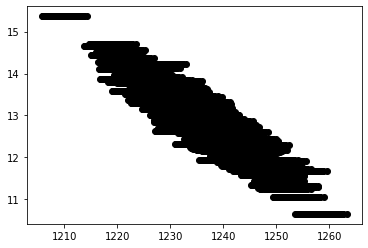

In [38]:
plt.plot(Opx_Liq_28a_29b['T_K_calc'], Opx_Liq_28a_29b['H2O_Liq'], 'ok')


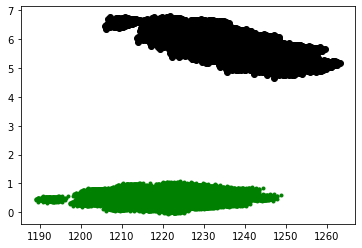

In [39]:
plt.plot(Opx_Liq_28a_29b['T_K_calc'], Opx_Liq_28a_29b['P_kbar_calc'], 'ok')
plt.plot(Opx_Liq_28a_Glob['T_K_calc'], Opx_Liq_28a_Glob['P_kbar_calc'], '.g')

plt.plot(Opx_Liq_28a_29a['T_K_calc'], Opx_Liq_28a_29a['P_kbar_calc'], '.r')

## Amp-Liq error

In [40]:
AmpLiq_Eq4b_eq7a=pt.calculate_amp_liq_press_temp_matching(amp_comps=B1038_AmpAv_noise1,
                                                liq_comps=B1038_LiqAv_noise1,
                                                equationT="T_Put2016_eq4b",
                                                equationP="P_Put2016_eq7a",
                                                return_all_pairs=True)
                                                
all_5_7a=AmpLiq_Eq4b_eq7a['All_PTs']                                                
AmpLiq_Eq9_eq7b=pt.calculate_amp_liq_press_temp_matching(amp_comps=B1038_AmpAv_noise1,
                                                liq_comps=B1038_LiqAv_noise1,
                                                equationT="T_Put2016_eq9",
                                                equationP="P_Put2016_eq7b",
                                                return_all_pairs=True)
all_9_7b=AmpLiq_Eq9_eq7b['All_PTs']                                                 

Youve selected a P-independent function
Note - Putirka 2016 spreadsheet calculates H2O using a H2O-solubility law of uncertian origin based on the pressure calculated for 7a, and iterates H"O and P. We dont do this, as we dont believe a pure h2o model is necessarily valid as you may be mixed fluid saturated or undersaturated. We recomend instead you choose a reasonable H2O content based on your system.
Youve selected a T-independent function
Done!
Youve selected a P-independent function
Youve selected a T-independent function
Done!


In [41]:
all_5_7a
all_9_7b

,P_kbar_calc,T_K_calc,Delta_Kd,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,...,CaO_Amp,Na2O_Amp,K2O_Amp,Cr2O3_Amp,F_Amp,Cl_Amp,Sample_ID_Amp_Num,Sample_ID_Amp,ID_AMP,Kd
0,8.907960,1192.127549,-0.205206,54.912127,0.553627,16.307607,3.913720,0.051642,4.589672,6.959841,...,11.232777,2.143813,0.217578,0.162638,0.0,0.0,0.0,MC,0,0.485206
1,8.540603,1194.488260,-0.187712,54.816276,0.683962,16.105675,4.051213,0.041923,4.579614,6.829921,...,11.232777,2.143813,0.217578,0.162638,0.0,0.0,0.0,MC,0,0.467712
2,8.690615,1192.269599,-0.221342,54.972176,0.707717,16.030288,3.846826,0.024116,4.661246,6.840823,...,11.232777,2.143813,0.217578,0.162638,0.0,0.0,0.0,MC,0,0.501342
3,8.994884,1193.474561,-0.213735,54.576712,0.316629,16.122398,3.852982,0.048289,4.597862,6.750081,...,11.232777,2.143813,0.217578,0.162638,0.0,0.0,0.0,MC,0,0.493735
4,8.793058,1190.616102,-0.239641,55.010871,0.726953,16.228299,3.651150,0.018053,4.585625,6.930745,...,11.232777,2.143813,0.217578,0.162638,0.0,0.0,0.0,MC,0,0.519641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,8.305007,1185.760599,-0.284863,54.681616,0.677159,16.243503,3.589515,0.068628,4.655392,6.877652,...,11.038029,2.095088,0.217578,0.233553,0.0,0.0,0.0,MC,499,0.564863
249996,8.480323,1189.004699,-0.232399,54.937659,0.608060,16.178420,3.881889,0.087654,4.566976,6.823633,...,11.038029,2.095088,0.217578,0.233553,0.0,0.0,0.0,MC,499,0.512399
249997,8.824673,1189.260585,-0.239559,54.790395,0.715327,16.075034,3.886054,0.077941,4.635765,6.944659,...,11.038029,2.095088,0.217578,0.233553,0.0,0.0,0.0,MC,499,0.519559
249998,8.124865,1185.807852,-0.288394,54.911732,0.514875,16.089309,3.592193,0.071318,4.687990,6.900088,...,11.038029,2.095088,0.217578,0.233553,0.0,0.0,0.0,MC,499,0.568394


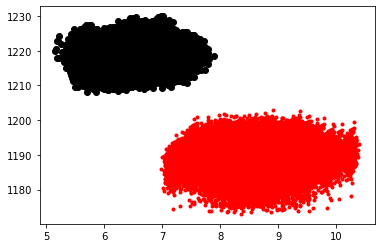

In [42]:
plt.plot(all_5_7a['P_kbar_calc'], all_5_7a['T_K_calc'], 'ok')
plt.plot(all_9_7b['P_kbar_calc'], all_9_7b['T_K_calc'], '.r')


## Cpx-Liq

In [43]:
Cpx_Liq_33_NP_all=pt.calculate_cpx_liq_press_temp_matching(cpx_comps=B1038_CpxAv_noise1,
                                        liq_comps=B1038_LiqAv_noise1,
                                        equationT='T_Put2008_eq33',
                                        equationP='P_Neave2017', return_all_pairs=True)
Cpx_Liq_33_NP=Cpx_Liq_33_NP_all['All_PTs']

C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2115: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)


Considering 250000 Liq-Cpx pairs, be patient if this is >>1 million!
No equilibrium filters applied
Finished calculating Ps and Ts, now just averaging the results. Almost there!
Done!


In [44]:
Cpx_Liq_33_30_all=pt.calculate_cpx_liq_press_temp_matching(cpx_comps=B1038_CpxAv_noise1,
                                        liq_comps=B1038_LiqAv_noise1,
                                        equationT='T_Put2008_eq33',
                                        equationP='P_Put2008_eq30', return_all_pairs=True)
Cpx_Liq_33_30=Cpx_Liq_33_30_all['All_PTs']

C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2115: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)


Considering 250000 Liq-Cpx pairs, be patient if this is >>1 million!
No equilibrium filters applied
Finished calculating Ps and Ts, now just averaging the results. Almost there!
Done!


In [45]:
Opam_all=pd.read_excel('ForPenny_Opam.xlsx')
Opam=Opam_all.loc[Opam_all['Test']==1]
Opam_F=Opam_all.loc[Opam_all['Test']==0]

## Summary figure - stacked histograms


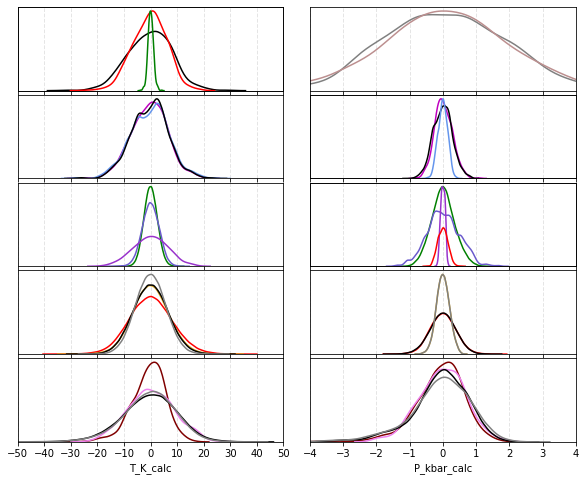

In [46]:
import seaborn as sns
import warnings as w
with w.catch_warnings():
    w.simplefilter('ignore')

    fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8), (ax9, ax10) ) = plt.subplots(5,2, figsize = (10,8)) 

    # Liquid
    ax=sns.distplot(Liq_Eq22-np.nanmedian(Liq_Eq22),  hist=False, ax=ax1, color='k')
    ax=sns.distplot(Liq_Eq14-np.nanmedian(Liq_Eq14),  hist=False, ax=ax1, color='r')
    ax1b=ax1.twinx()
    ax=sns.distplot(Liq_Helz-np.nanmedian(Liq_Helz),  hist=False, ax=ax1b, color='g')

    # Opx - Liq Temp


    ax=sns.distplot(Opx_Liq_28a_29c['T_K_calc']-np.nanmedian(Opx_Liq_28a_29c['T_K_calc']),  
             hist=False, ax=ax3, color='m')

    ax=sns.distplot(Opx_Liq_28a_29a['T_K_calc']-np.nanmedian(Opx_Liq_28a_29a['T_K_calc']),
            hist=False, ax=ax3, color='black')
    ax=sns.distplot(Opx_Liq_28a_Glob['T_K_calc']-np.nanmedian(Opx_Liq_28a_Glob['T_K_calc']),
            hist=False, ax=ax3, color='cornflowerblue')
    
    ax=sns.distplot(Opx_Liq_28a_29b['T_K_calc']-np.nanmedian(Opx_Liq_28a_29b['T_K_calc']), 
              hist=False, ax=ax3, color='black', kde_kws={'linestyle':'-'})
    # Amp-Liq error
    all_5_7a
    all_9_7b
    bins_Amp=10
    ax=sns.distplot(all_5_7a['T_K_calc']-np.nanmedian(all_5_7a['T_K_calc']), 
              hist=False, ax=ax5, color='green')
    ax=sns.distplot(all_9_7b['T_K_calc']-np.nanmedian(all_9_7b['T_K_calc']), 
              hist=False, ax=ax5, color='slateblue')
    ax=sns.distplot(Amp_Ridolfi['T_K_calc']-np.nanmedian(Amp_Ridolfi['T_K_calc']), 
             hist=False, ax=ax5, color='darkorchid')


    ## Cpx Opx error
    ax=sns.distplot(CalcP_3639['T_K_calc']-np.nanmedian(CalcP_3639['T_K_calc']), 
              hist=False, ax=ax7, color='r')
    ax=sns.distplot(CalcP_3638['T_K_calc']-np.nanmedian(CalcP_3638['T_K_calc']), 
              hist=False, ax=ax7, color='goldenrod')
    
    ax=sns.distplot(CalcP_3739['T_K_calc']-np.nanmedian(CalcP_3739['T_K_calc']), 
              hist=False, ax=ax7, color='black',  kde_kws={'linestyle':'-'})
    ax=sns.distplot(CalcP_3738['T_K_calc']-np.nanmedian(CalcP_3738['T_K_calc']), 
              hist=False, ax=ax7, color='grey',  kde_kws={'linestyle':'-'})
    
    ## Cpx-Liq error
    ax=sns.distplot(Cpx_B1038_Putirka['T_K_calc']-np.nanmedian(Cpx_B1038_Putirka['T_K_calc']), 
              hist=False, ax=ax9, color='maroon')

    ax=sns.distplot(Cpx_B1038_Wang['T_K_calc']-np.nanmedian(Cpx_B1038_Wang['T_K_calc']), 
             hist=False, ax=ax9, color='violet')

    ax=sns.distplot(Cpx_Liq_33_NP['T_K_calc']-np.nanmedian(Cpx_Liq_33_NP['T_K_calc']), 
             hist=False, ax=ax9, color='black')

    ax=sns.distplot(Cpx_Liq_33_30['T_K_calc']-np.nanmedian(Cpx_Liq_33_30['T_K_calc']), 
             hist=False, ax=ax9, color='grey')


    ############################### PRESSURES ###########################################################3
    # Liquid - Need OPAM from Matt

    
    ax=sns.distplot(Opam['P_kbar']-np.nanmedian(Opam['P_kbar']), 
              hist=False, ax=ax2, color='grey')
    ax=sns.distplot(Opam_F['P_kbar']-np.nanmedian(Opam_F['P_kbar']), 
              hist=False, ax=ax2, color='rosybrown')    
    
    # Opx - Liq Press

    ax=sns.distplot(Opx_Liq_28a_29c['P_kbar_calc']-np.nanmedian(Opx_Liq_28a_29c['P_kbar_calc']),  
             hist=False, ax=ax4, color='m')

    ax=sns.distplot(Opx_Liq_28a_29a['P_kbar_calc']-np.nanmedian(Opx_Liq_28a_29a['P_kbar_calc']),
            hist=False, ax=ax4, color='black')

    ax4b=ax4.twinx()
    ax=sns.distplot(Opx_Liq_28a_Glob['P_kbar_calc']-np.nanmedian(Opx_Liq_28a_Glob['P_kbar_calc']),
            hist=False, ax=ax4b, color='cornflowerblue')
    
    ax=sns.distplot(Opx_Liq_28a_29b['P_kbar_calc']-np.nanmedian(Opx_Liq_28a_29b['P_kbar_calc']), 
              hist=False, ax=ax4, color='black',  kde_kws={'linestyle':'-'})
    # Amp-Liq error
    all_5_7a
    all_9_7b
    bins_Amp=10
    ax=sns.distplot(all_5_7a['P_kbar_calc']-np.nanmedian(all_5_7a['P_kbar_calc']), 
              hist=False, ax=ax6, color='green')
    ax=sns.distplot(all_9_7b['P_kbar_calc']-np.nanmedian(all_9_7b['P_kbar_calc']), 
              hist=False, ax=ax6, color='slateblue')
    ax6b=ax6.twinx()
    ax=sns.distplot(Amp_Ridolfi['P_kbar_calc']-np.nanmedian(Amp_Ridolfi['P_kbar_calc']), 
             hist=False, ax=ax6b, color='darkorchid')
    ax=sns.distplot(Amp_B1038_Medard-np.nanmedian(Amp_B1038_Medard), 
             hist=False, ax=ax6b, color='red')

    ## Cpx Opx error
    ax=sns.distplot(CalcP_3639['P_kbar_calc']-np.nanmedian(CalcP_3639['P_kbar_calc']), 
              hist=False, ax=ax8, color='r')
    ax=sns.distplot(CalcP_3638['P_kbar_calc']-np.nanmedian(CalcP_3638['P_kbar_calc']), 
              hist=False, ax=ax8, color='goldenrod')
    
    ax=sns.distplot(CalcP_3739['P_kbar_calc']-np.nanmedian(CalcP_3739['P_kbar_calc']), 
              hist=False, ax=ax8, color='black',   kde_kws={'linestyle':'-'})
    ax=sns.distplot(CalcP_3738['P_kbar_calc']-np.nanmedian(CalcP_3738['P_kbar_calc']), 
              hist=False, ax=ax8, color='grey',  kde_kws={'linestyle':'-'})
    ## Cpx-Liq error
    ax=sns.distplot(Cpx_B1038_Putirka['P_kbar_calc']-np.nanmedian(Cpx_B1038_Putirka['P_kbar_calc']), 
              hist=False, ax=ax10, color='maroon')

    ax=sns.distplot(Cpx_B1038_Wang['P_kbar_calc']-np.nanmedian(Cpx_B1038_Wang['P_kbar_calc']), 
             hist=False, ax=ax10, color='violet')

    ax=sns.distplot(Cpx_Liq_33_NP['P_kbar_calc']-np.nanmedian(Cpx_Liq_33_NP['P_kbar_calc']), 
             hist=False, ax=ax10, color='black')

    ax=sns.distplot(Cpx_Liq_33_30['P_kbar_calc']-np.nanmedian(Cpx_Liq_33_30['P_kbar_calc']), 
             hist=False, ax=ax10, color='grey')    
    ax1.grid(color = 'k', linestyle = '--', axis='x', linewidth = 1, alpha = 0.1)
    ax3.grid(color = 'k', linestyle = '--', axis='x', linewidth = 1, alpha = 0.1)
    ax5.grid(color = 'k', linestyle = '--', axis='x', linewidth = 1, alpha = 0.1)
    ax7.grid(color = 'k', linestyle = '--', axis='x', linewidth = 1, alpha = 0.1)
    ax9.grid(color = 'k', linestyle = '--', axis='x', linewidth = 1, alpha = 0.1)

    ax2.grid(color = 'k', linestyle = '--', axis='x', linewidth = 1, alpha = 0.1)
    ax4.grid(color = 'k', linestyle = '--', axis='x', linewidth = 1, alpha = 0.1)
    ax6.grid(color = 'k', linestyle = '--', axis='x', linewidth = 1, alpha = 0.1)
    ax8.grid(color = 'k', linestyle = '--', axis='x', linewidth = 1, alpha = 0.1)
    ax10.grid(color = 'k', linestyle = '--', axis='x', linewidth = 1, alpha = 0.1)

    ax1.set_xticks([-50, -40,  -30, -20, -10, 0, 10, 20, 30, 40, 50])
    ax1.set_xticklabels(['', '', '', '', '', '', '', '', '','', ''])
    ax3.set_xticks([-50, -40,  -30, -20, -10, 0, 10, 20, 30, 40, 50])
    ax3.set_xticklabels(['', '', '', '', '', '', '', '', '','', ''])
    ax5.set_xticks([-50, -40,  -30, -20, -10, 0, 10, 20, 30, 40, 50])
    ax5.set_xticklabels(['', '', '', '', '', '', '', '', '','', ''])
    ax7.set_xticks([-50, -40,  -30, -20, -10, 0, 10, 20, 30, 40, 50])
    ax7.set_xticklabels(['', '', '', '', '', '', '', '', '','', ''])
    ax9.set_xticks([-50, -40,  -30, -20, -10, 0, 10, 20, 30, 40, 50])

    
    ax2.set_xticks([-4, -3,  -2, -1,  0, 1, 2, 3, 4, 5])
    ax2.set_xticklabels(['', '', '', '', '', '', '', '', '',''])
    ax4.set_xticks([-4, -3,  -2, -1,  0, 1, 2, 3, 4, 5])
    ax4.set_xticklabels(['', '', '', '', '', '', '', '', '',''])
    ax6.set_xticks([-4, -3,  -2, -1,  0, 1, 2, 3, 4, 5])
    ax6.set_xticklabels(['', '', '', '', '', '', '', '', '',''])
    ax8.set_xticks([-4, -3,  -2, -1,  0, 1, 2, 3, 4, 5])
    ax8.set_xticklabels(['', '', '', '', '', '', '', '', '',''])

    ax1.axes.get_yaxis().set_visible(False)
    ax1b.axes.get_yaxis().set_visible(False)

    ax2.axes.get_yaxis().set_visible(False)
    ax3.axes.get_yaxis().set_visible(False)
    ax4.axes.get_yaxis().set_visible(False)
    ax4b.axes.get_yaxis().set_visible(False)

    ax5.axes.get_yaxis().set_visible(False)
    ax6.axes.get_yaxis().set_visible(False)
    ax6b.axes.get_yaxis().set_visible(False)
   
    ax7.axes.get_yaxis().set_visible(False)
    ax8.axes.get_yaxis().set_visible(False)
    ax9.axes.get_yaxis().set_visible(False)
    ax10.axes.get_yaxis().set_visible(False)

    x1=-50
    x2=+50
    ax1.set_xlim([x1,x2])
    ax3.set_xlim([x1,x2])
    ax5.set_xlim([x1,x2])
    ax7.set_xlim([x1,x2])
    ax9.set_xlim([x1,x2])

    x3=-4
    x4=+4
    ax2.set_xlim([x3,x4])
    ax4.set_xlim([x3,x4])
    ax6.set_xlim([x3,x4])
    ax8.set_xlim([x3,x4])
    ax10.set_xlim([x3,x4])
    #fig.tight_layout()

    plt.subplots_adjust(wspace=0.1, hspace=0.05)
    fig.savefig('MonteCarlo_Simulations.png', dpi=200)


## Making crustal thickness histogram


In [48]:
spread_rate_ocean=pd.read_excel(r'G:\My Drive\Berkeley_NEW\Barometry_Review_Thoughts\Crustal_Thickness_Compilation.xlsx', sheet_name='Chen_1992')
spread_rate_p40=spread_rate_ocean.loc[spread_rate_ocean['Spreading_rate']>40]
spread_rate_l40=spread_rate_ocean.loc[spread_rate_ocean['Spreading_rate']<40]

Arc_Profeta=pd.read_excel(r'G:\My Drive\Berkeley_NEW\Barometry_Review_Thoughts\Crustal_Thickness_Compilation.xlsx', sheet_name='Profeta_2015')
OIB_Comp=pd.read_excel(r'G:\My Drive\Berkeley_NEW\Barometry_Review_Thoughts\Crustal_Thickness_Compilation.xlsx', sheet_name='Ocean_Islands')

In [61]:
Ocean_Press=10**(-8)*spread_rate_ocean['Crustal_thickness']*1000*(9.8*2700)
OIB_Press=10**(-8)*OIB_Comp['Crustal Thickness_av']*1000*(9.8*2700)
Arc_Press=10**(-8)*Arc_Profeta['Moho_depth']*1000*(9.8*2700)

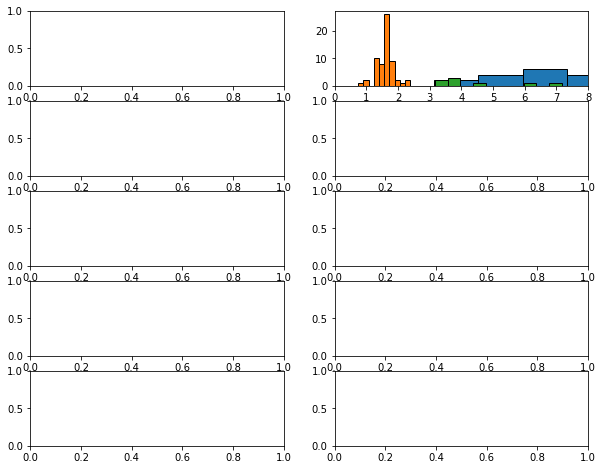

In [76]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8), (ax9, ax10) ) = plt.subplots(5,2, figsize = (10,8)) 


ax2.hist(Arc_Press, ec='k')
ax2.hist(Ocean_Press, ec='k')
ax2.hist(OIB_Press, ec='k')
ax2.set_xlim([0, 8])
fig.savefig('DepthTest.png', dpi=200)

(0.0, 4.0)

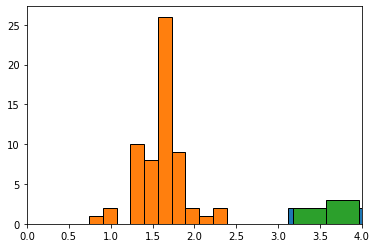

In [73]:
plt.hist(Arc_Press, ec='k')
plt.hist(Ocean_Press, ec='k')
plt.hist(OIB_Press, ec='k')
plt.xlim([0, 4])

(-4.0, 4.0)

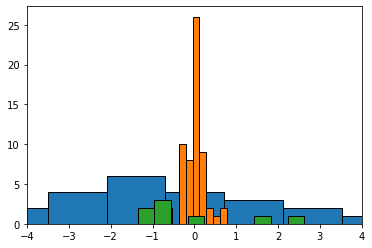

In [72]:
plt.hist(Arc_Press-np.nanmean(Arc_Press), ec='k')
plt.hist(Ocean_Press-np.nanmean(Ocean_Press), ec='k')
plt.hist(OIB_Press-np.nanmean(OIB_Press), ec='k')
plt.xlim([-4, 4])

In [ ]:
plt.plot(0, 0, 'o', color='darkorchid', ms=30)
plt.plot(1, 1, 'ok', color='slateblue', ms=30, lw=10)

In [ ]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8), (ax9, ax10) ) = plt.subplots(5,2, figsize = (8,10)) 
ax=sns.distplot(Amp_Ridolfi['T_K_calc']-np.nanmedian(Amp_Ridolfi['T_K_calc']), 
         hist=False)


In [ ]:
len(Amp_Ridolfi['T_K_calc'])